# Módulo 01 -  Analisando Dados da Saúde com Python e Pandas

Nesse módulo trabalhamos com dois datasets retirados do [site do próprio SUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def), um de **processamento** e outro de **atendimentos**. [Nesta nota técnica](http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf) encontrada junto aos dados, temos uma descrição melhor do que é cada coisa.

**Dataset Processamentos** (Ano e mês de processamento)
Período do processamento da informação, sendo igual ao mês anterior ao da apresentação da AIH (Autorização de Internação Hospitalar) para faturamento. Corresponde, geralmente, ao mês da alta. Nas seguintes situações não é o mês da alta:
- AIH reapresentada por ter sido rejeitada em algum processamento anterior;
- AIH apresentada com atraso;
- AIH referentes a internações de longa permanência; são apresentadas, neste caso, várias AIH para uma mesma internação em meses consecutivos.


**Dataset Atendimentos** (Ano e mês de atendimento)
Período correspondente à data de internação do paciente na unidade hospitalar.

## Aula 01 - Aquisição e Leitura de Dados Reais

In [1]:
# importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

# carregando algumas opções

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# carregando os dados

raw_data_process = pd.read_csv('../data/datasus_processamento.csv',
                       sep = ';',
                       encoding = 'ISO-8859-1', 
                       skiprows = 3,
                       skipfooter = 12,
                       thousands = '.',
                       decimal = ',',
                       engine = 'python')

In [3]:
raw_data_process.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,328876965.09
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4705309002.29


In [4]:
raw_data_process['2008/Ago'].mean()

27800320.306666665

In [5]:
# cópia dos dados originais para garantir que eles não sejam sobrescritos
processamento = raw_data_process.copy()

# remove os números dos nomes das unidades da federação
processamento['Unidade da Federação'] = processamento['Unidade da Federação'].str[3:]

processamento.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,328876965.09
4,Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4705309002.29


Aqui irei adicionar uma coluna extra ao dataframe com as siglas de cada UF. Isso nos auxiliará na visualização de gráficos.

No livro _"Storytelling With Data"_, quase uma bíblia para a visualização de dados, é recomendado não deixar as "labels" dos eixos na diagonal, pois isso dificulta a leitura das informações. [Aqui](https://www.storytellingwithdata.com/blog/2020/4/22/alternatives-to-diagonal-axis-labels) são apresentadas algumas alternativas para resolvermos isso. Por isso escolhi utilizar as siglas de cada UF nos gráficos que precisarem disso.

In [6]:
siglas = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA',
          'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

processamento['UF'] = siglas

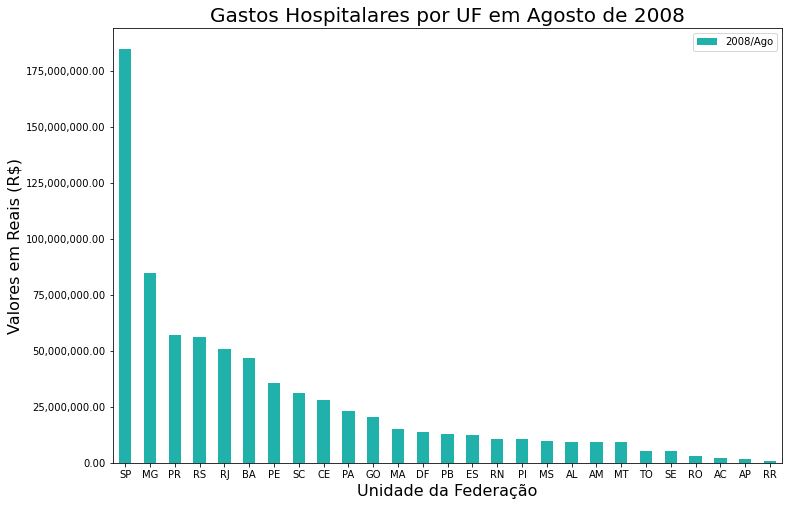

In [7]:
ax = processamento.sort_values(by = '2008/Ago', ascending = False).plot(x = 'UF',
                                                                        y = '2008/Ago',
                                                                        kind = 'bar',
                                                                        figsize = (12, 8),
                                                                        color = 'lightseagreen')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation = 0)

plt.title('Gastos Hospitalares por UF em Agosto de 2008', fontsize = 20)
plt.xlabel('Unidade da Federação', fontsize = 16)
plt.ylabel('Valores em Reais (R$)', fontsize = 16)

plt.show()

Qual o mês mais recente?

In [8]:
# vamos pegar os nomes das 5 últimas colunas
processamento.columns[-3:]

Index(['2021/Mar', 'Total', 'UF'], dtype='object')

Com isso, vemos que o mês mais recente é "Março de 2021".

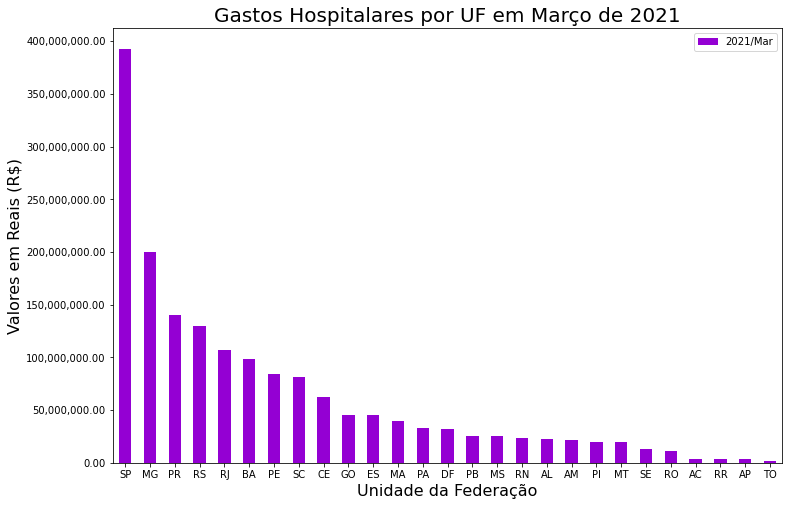

In [9]:
ax = processamento.sort_values(by = '2021/Mar', ascending = False).plot(x = 'UF', 
                                                                        y = '2021/Mar',
                                                                        kind = 'bar',
                                                                        figsize = (12, 8),
                                                                        color = 'darkviolet')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation = 0)

plt.title('Gastos Hospitalares por UF em Março de 2021', fontsize = 20)
plt.xlabel('Unidade da Federação', fontsize = 16)
plt.ylabel('Valores em Reais (R$)', fontsize = 16)

plt.show()

Logo de imediato percebemos que o gasto hospitalar aumentou bastante de 2008 pra 2021. A conclusão mais óbvia que podemos fazer é "Covid-19", mas para termos certeza devemos analisar o crescimento dos gastos ao longo dos meses para vermos alguma tendência de crescimento.

Uma outra observação que podemos fazer é que as Unidades da Federação estão ordenadas no dataframe por suas respectivas regiões. Usaremos esse fato futuramente para algumas análises.

O que aprendemos nessa aula:
- Como utilizar o Tabnet para buscar dados da saúde Brasileira;
- Como utilizar o google Colaboratory;
- Como ler um arquivo CSV com Pandas;
- Como ler um arquivo CSV com caracteres especiais do idioma português;
- Como ignorar o cabeçalho de um arquivo CSV;
- O que são DataFrame;
- Os desafios de ler um arquivo do mundo real;
- Como formatar a impressão dos dados de um DataFrame Pandas;
- Como plotar um gráfico com o Pandas;
- Como formatar a sua visualização;
- Como alterar os ticks do seu gráfico utilizando o Matplotlib.

## Aula 02 - Primeiras Visualizações de Dados

As bibliotecas já estão carregadas no início do notebook.

In [10]:
# carregando os dados

raw_data_atendimento = pd.read_csv('../data/datasus_atendimento.csv',
                       sep = ';',
                       encoding = 'ISO-8859-1', 
                       skiprows = 3,
                       skipfooter = 12,
                       thousands = '.',
                       decimal = ',',
                       engine = 'python')

In [11]:
raw_data_atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [12]:
# cópia dos dados originais para garantir que eles não sejam sobrescritos
atendimento = raw_data_atendimento.copy()

# remove os números dos nomes das unidades da federação
atendimento['Unidade da Federação'] = atendimento['Unidade da Federação'].str[3:]

atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [13]:
atendimento.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

In [14]:
colunas_usaveis = atendimento.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [15]:
usaveis = atendimento[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [16]:
usaveis = usaveis.set_index('Unidade da Federação')

In [17]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


Após realizarmos essa operação de ```.set_index()``` é adicionada uma noma linha ao dataframe. [Aqui](https://stackoverflow.com/questions/43191342/pandas-set-index-creates-undesired-new-row-how-do-i-just-do-the-obvious-thing) vemos um solução pra isso.

In [18]:
usaveis.index.name = None
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [19]:
usaveis.T.tail()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,...,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,...,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,...,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,...,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,...,3405850698.58,10337389922.09,41396408548.81,14681514706.67,7835011163.40,12764391179.92,2324525096.33,2180119781.15,4973572261.43,2592422853.56


In [20]:
usaveis = usaveis.drop(['Total'], axis = 1)

<AxesSubplot:>

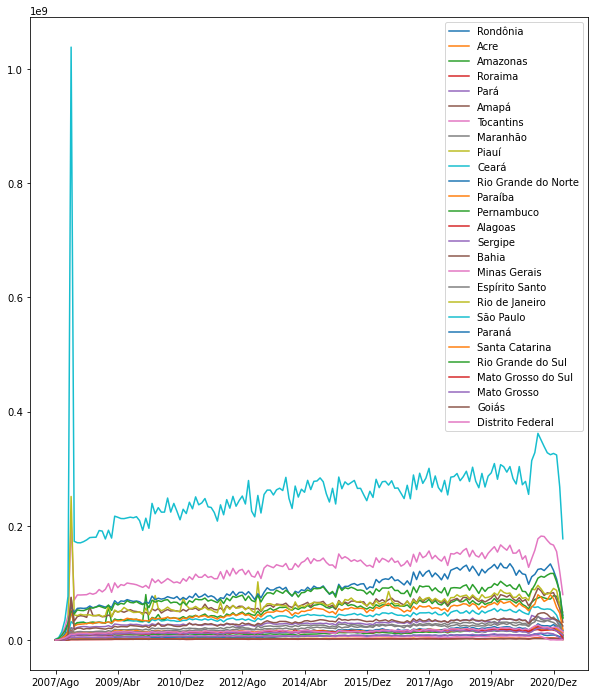

In [21]:
usaveis.T.plot(figsize = (10, 12))

Esse pico no início do gráfico não está nada bonito. Creio que o motivo dele existir é que, como os dados só começaram a serem totalmente contabilizados a partir de Agosto de 2007, os dados anteriores a esse período podem ter sido adicionados à base de dados juntamente com os dados de 2007, e com isso criando esse pico. Para que esses dados não obfusquem nossa visualização, iremos removê-los e contar os anos apenas após 2008.

In [22]:
usaveis = usaveis.drop(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez'], axis = 1)

<AxesSubplot:>

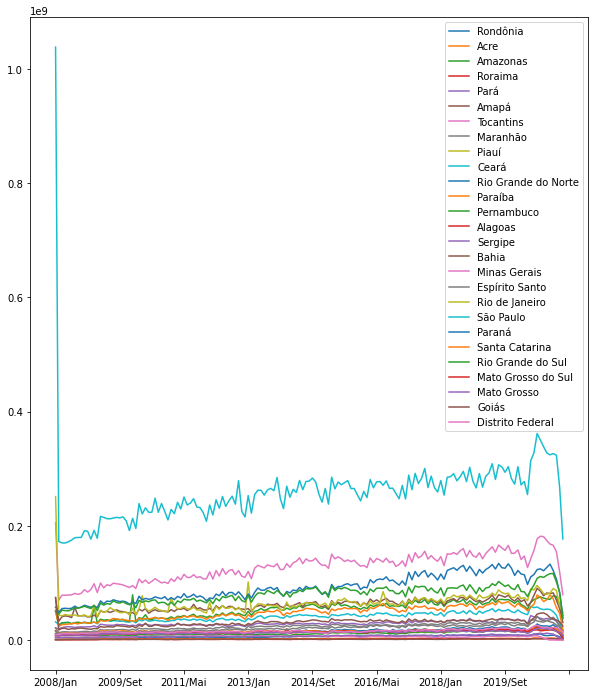

In [23]:
usaveis.T.plot(figsize = (10, 12))

Opa! Removemos todo o ano de 2007 e parece que ainda restou um mês com valores altos, janeiro de 2008. Uma hipótese pra isso é que os dados de cada mês na verdade aparecem no mês seguinte, então janeiro de 2008 pode estar representando dezembro de 2007 (estamos apenas especulando).

In [24]:
# removendo janeiro de 2008
usaveis = usaveis.drop('2008/Jan', axis = 1)

<AxesSubplot:>

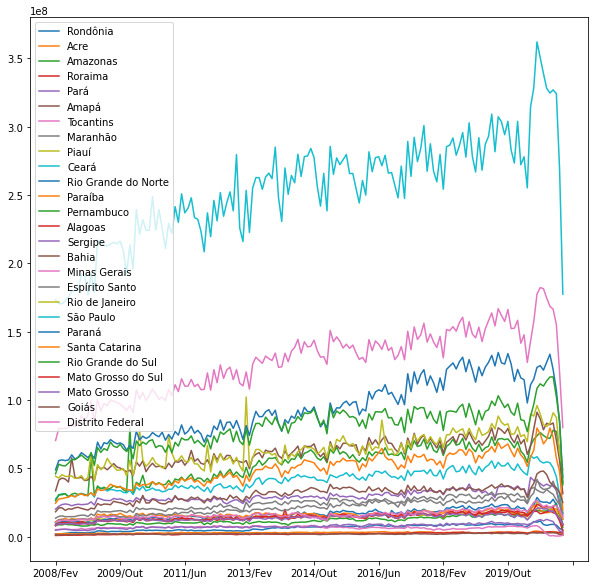

In [25]:
usaveis.T.plot(figsize = (10, 10))

Aparentemente já temos um gráfico com valores mais comparáveis, e um notável aumento de atendimentos no ano de 2020, reforçando nossa hipótese da "Covid-19".

Vamos melhorar esse gráfico.

In [26]:
usaveis.index

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object')

Vemos que as UFs estão ordenadas por região. Vamos usar isso a nosso favor.

In [27]:
norte = usaveis.index[:7]
nordeste = usaveis.index[7:16]
sudeste = usaveis.index[16:20]
sul = usaveis.index[20:23]
centro_oeste = usaveis.index[23:]

<a name="grafico-regioes"></a>

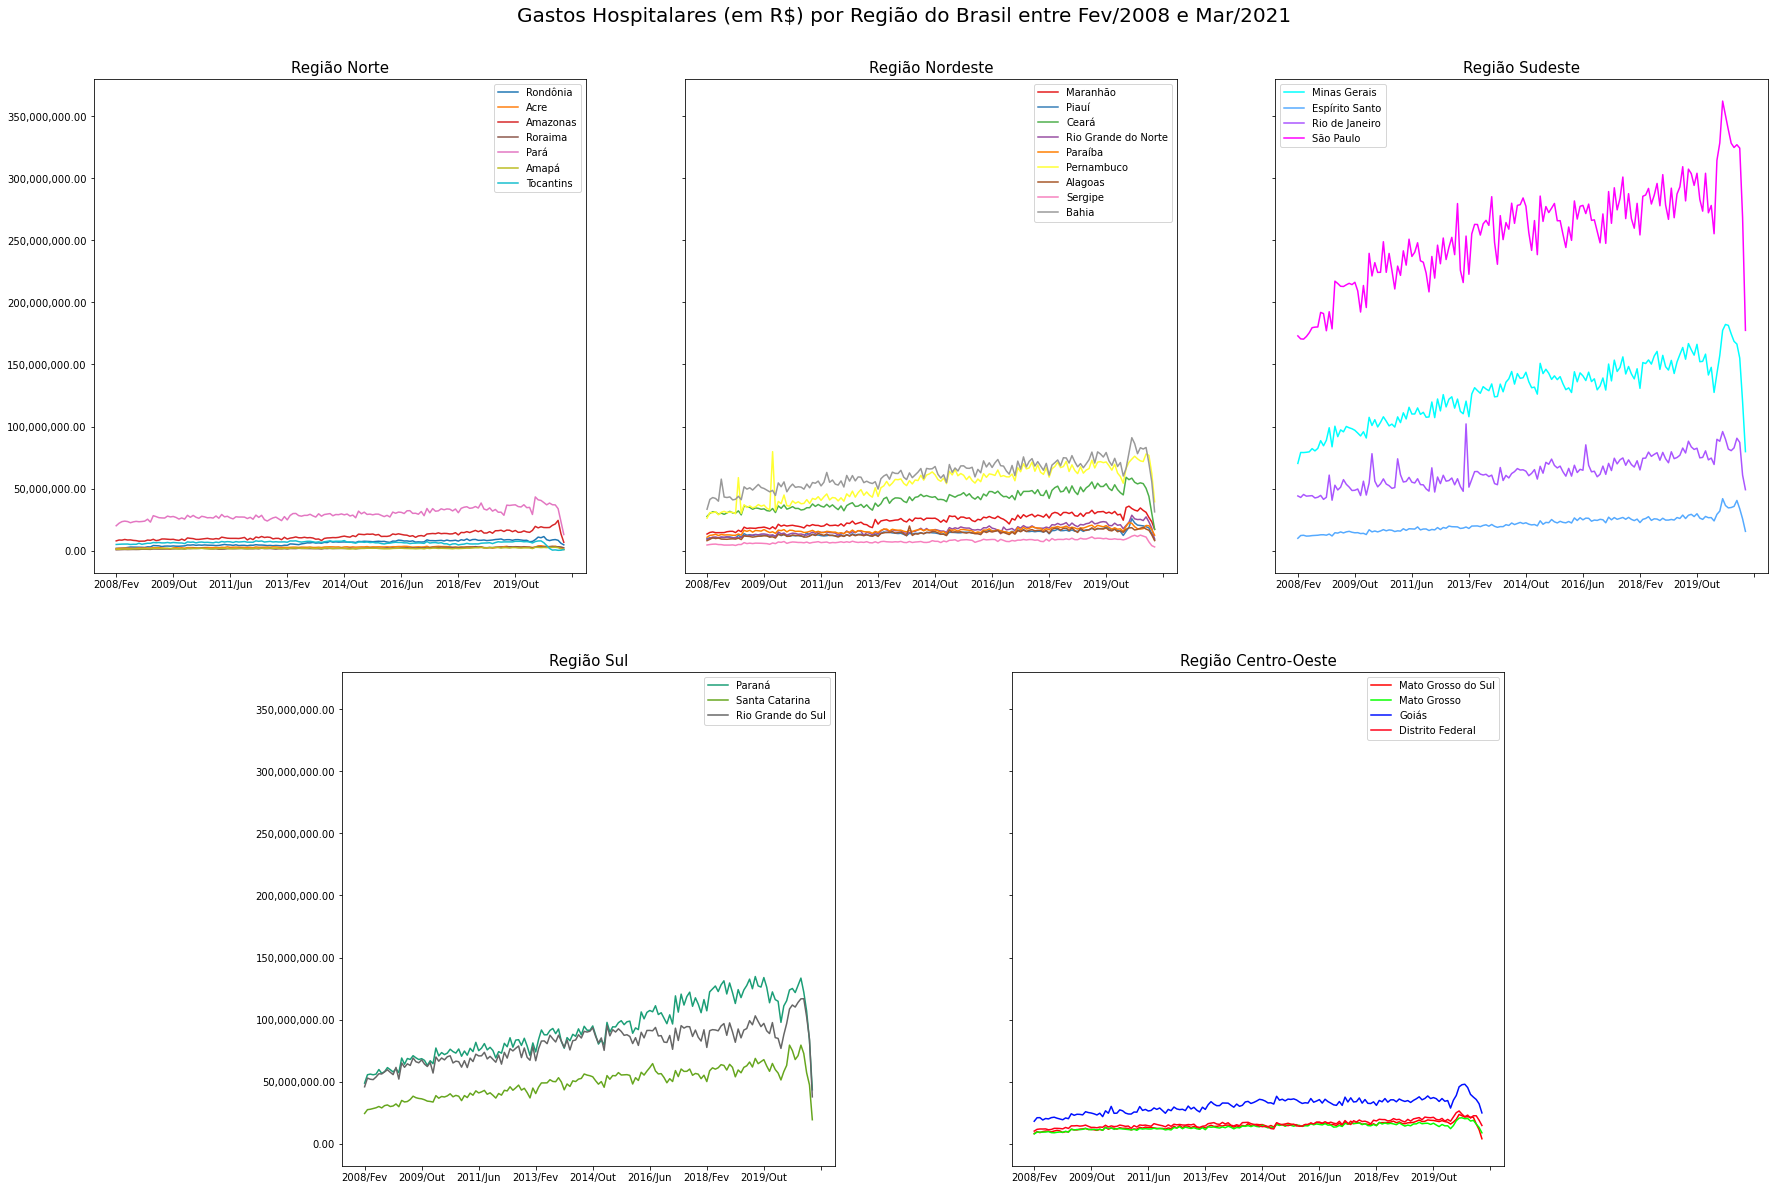

In [28]:
fig, axes = plt.subplots(2, 3, sharex = False, sharey = True, figsize = (30, 20))

plt.suptitle("Gastos Hospitalares (em R$) por Região do Brasil entre Fev/2008 e Mar/2021", fontsize = 20, y = 0.93)

axes[1, 2].set_visible(False)

usaveis.loc[norte].T.plot(ax = axes[0, 0], colormap = 'tab10')
axes[0, 0].set_title('Região Norte', fontsize = 15)
axes[0, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

usaveis.loc[nordeste].T.plot(ax = axes[0, 1], colormap = 'Set1')
axes[0, 1].set_title('Região Nordeste', fontsize = 15)

usaveis.loc[sudeste].T.plot(ax = axes[0, 2], colormap = 'cool')
axes[0, 2].set_title('Região Sudeste', fontsize = 15)

usaveis.loc[sul].T.plot(ax = axes[1, 0], colormap = 'Dark2')
axes[1, 0].set_title('Região Sul', fontsize = 15)

usaveis.loc[centro_oeste].T.plot(ax = axes[1, 1], colormap = 'hsv')
axes[1, 1].set_title('Região Centro-Oeste', fontsize = 15)

axes[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axes[1][1].set_position([0.55, 0.125, 0.228, 0.343])

# plt.savefig('estados.jpg')

plt.show()

Referência pras cores: https://matplotlib.org/stable/gallery/color/colormap_reference.html

Ideia. Ordernar o dataframe ```usaveis``` por total antes de plotar os gráficos, para que as legendas fiquem na ordem.

O que aprendemos nessa aula:
- Como realizar um slice no DataFrame com Pandas;
- Formas de lidar com dados faltantes;
- Utilizar o insert do Pandas;
- Como transpor sua matriz de dados.

## Aula 03 - Manipulação de Dados

Adicionando uma coluna com a região de cada UF.

In [29]:
atend = raw_data_atendimento.copy()

In [30]:
atend = atend.set_index('Unidade da Federação').rename_axis(None)

In [31]:
regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
estados = atend.index
atend["Regioes"] = list(map(lambda estado: regioes[estado[0]] , estados))
atend.index = atend.index.str[3:]

In [32]:
colunas_usaveis = atend.mean().index.tolist()
colunas_usaveis.insert(0, 'Regioes')

In [33]:
atend_usaveis = atend[colunas_usaveis]
atend_usaveis.head()

,Regioes,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [34]:
atend_usaveis = atend_usaveis.drop(atend_usaveis.iloc[:, 1:7], axis = 1)

In [35]:
atend_usaveis = atend_usaveis.drop('Total', axis = 1)

In [36]:
atend_usaveis.head()

,Regioes,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Rondônia,Norte,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
Acre,Norte,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
Amazonas,Norte,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
Roraima,Norte,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
Pará,Norte,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31


In [37]:
atend_usaveis['Total'] = atend_usaveis.sum(axis = 1)

### Análise de Casos de Dengue e Gastos Hospitalares

Vamos buscar os casos relacionados à dengue no mesmo site do [DataSUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def) que usamos anteriormente.

Existe uma outra base de dados com informações mais detalhadas e específicas sobre a dengue no Brasil, mas devido a dificuldade de obter os dados separados por "ano/mês" optei por usar os dados de internações e procedimentos relacionados à dengue, visto que aqui estamos fazendo apenas uma análise mais superficial.

Ou seja, temos os dados das "Internações por Unidade da Federação e Ano/mês atendimento" relacionados aos procedimentos
- HISTOPATOLOGIA P/ IDENTIFICACAO DE DENGUE,
- IMUNOHISTOQUIMICA P/ IDENTIFICACAO DO VÍRUS DA DENGUE,
- TESTE RÁPIDO PARA DENGUE IGG/IGM,
- TRATAMENTO DE DENGUE CLÁSSICA,
- TRATAMENTO DE DENGUE HEMORRÁGICA.

Com isso podemos ter uma visão geral do comportamento da dengue desde Julho de 2007.

In [38]:
# importar os dados

raw_data_dengue = pd.read_csv('../data/datasus_procedimentos_dengue.csv',
                               sep = ';',
                               encoding = 'ISO-8859-1', 
                               skiprows = 4,
                               skipfooter = 12,
                               thousands = '.',
                               decimal = ',',
                               engine = 'python')

In [39]:
raw_data_dengue.head()

,Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,2,77,202,237,237,...,15,7,12,16,10,20,12,16,4,22386
1,12 Acre,-,-,-,-,1,3,15,13,12,...,5,3,8,7,27,92,67,95,47,4793
2,13 Amazonas,-,-,-,-,1,61,175,246,248,...,20,17,6,14,30,39,43,56,52,6490
3,14 Roraima,-,-,-,-,-,-,7,13,32,...,1,1,-,-,-,-,-,-,-,4069
4,15 Pará,-,4,12,38,163,610,1382,1324,1274,...,3,11,8,8,11,15,17,30,22,50949


Vamos comparar esses dados da dengue com o dataset **atendimentos**, pois nele os dados correspondem ao próprio mês em questão, e não ao mês anterior, como no dataset **processamento**.


Já temos os **atendimentos** organizados, como podemos ver abaixo.

In [40]:
atend_usaveis.head()

,Regioes,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Rondônia,Norte,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,993368167.90
Acre,Norte,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,447133893.36
Amazonas,Norte,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1897358768.12
Roraima,Norte,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,327167600.86
Pará,Norte,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4662752361.13


Existe algum valor nulo em atendimentos?

In [41]:
atend_usaveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 160 entries, Regioes to Total
dtypes: float64(159), object(1)
memory usage: 34.0+ KB


In [42]:
atend_usaveis.isnull().sum().unique()

array([0])

Antes de trabalharmos com os dados da dengue, vamos melhorar o dataset e deixá-lo com um período de tempo compatível com os atendimentos.

In [43]:
# cópia do dataset original
dengue = raw_data_dengue.copy()

In [44]:
# coloca as UFs como índice
dengue = dengue.set_index('Unidade da Federação').rename_axis(None)

In [45]:
# dropa os 6 primeiros meses, para ficar com o mesmo período de tempo de 'atendimentos'
dengue = dengue.drop(dengue.iloc[:, 0:7], axis = 1)

In [46]:
dengue.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
11 Rondônia,237,237,209,65,29,22,21,19,11,44,...,15,7,12,16,10,20,12,16,4,22386
12 Acre,13,12,24,18,6,4,1,7,7,8,...,5,3,8,7,27,92,67,95,47,4793
13 Amazonas,246,248,209,72,19,15,11,9,7,8,...,20,17,6,14,30,39,43,56,52,6490
14 Roraima,13,32,90,107,108,163,193,106,64,55,...,1,1,-,-,-,-,-,-,-,4069
15 Pará,1324,1274,1385,781,429,204,166,181,218,341,...,3,11,8,8,11,15,17,30,22,50949


In [47]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 159 entries, 2008/Fev to Total
dtypes: int64(86), object(73)
memory usage: 33.8+ KB


Observamos que existem 73 colunas com dados do tipo ```object```, quando queríamos que todas elas fossem do tipo ```int64```.

Isso se dá pelo fato de termos dados faltantes que foram substituídos com '-' (hífen).

Aqui precisamos tomar um decisão sobre o que faremos com esses dados.

Observado novamente o dataset, percebemos que os dados faltantes aparecem em Estaddos onde existem poucos procedimentos sendo realizados por mês, o que me leva a entender que os dados faltantes são na verdade o valor "zero", ou seja, nenhum procedimento realizado.

Então irei substituir os valores faltantes por zero.

In [48]:
dengue = dengue.replace('-', '0')

In [49]:
dengue.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
11 Rondônia,237,237,209,65,29,22,21,19,11,44,...,15,7,12,16,10,20,12,16,4,22386
12 Acre,13,12,24,18,6,4,1,7,7,8,...,5,3,8,7,27,92,67,95,47,4793
13 Amazonas,246,248,209,72,19,15,11,9,7,8,...,20,17,6,14,30,39,43,56,52,6490
14 Roraima,13,32,90,107,108,163,193,106,64,55,...,1,1,0,0,0,0,0,0,0,4069
15 Pará,1324,1274,1385,781,429,204,166,181,218,341,...,3,11,8,8,11,15,17,30,22,50949


In [50]:
regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
estados = dengue.index
dengue.insert(0, 'Regioes', list(map(lambda estado: regioes[estado[0]] , estados)))
dengue.index = dengue.index.str[3:]

In [51]:
dengue.head()

,Regioes,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Rondônia,Norte,237,237,209,65,29,22,21,19,11,...,15,7,12,16,10,20,12,16,4,22386
Acre,Norte,13,12,24,18,6,4,1,7,7,...,5,3,8,7,27,92,67,95,47,4793
Amazonas,Norte,246,248,209,72,19,15,11,9,7,...,20,17,6,14,30,39,43,56,52,6490
Roraima,Norte,13,32,90,107,108,163,193,106,64,...,1,1,0,0,0,0,0,0,0,4069
Pará,Norte,1324,1274,1385,781,429,204,166,181,218,...,3,11,8,8,11,15,17,30,22,50949


In [52]:
dengue.loc[:, dengue.columns != 'Regioes'] = dengue.apply(pd.to_numeric, errors='coerce')

In [53]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 160 entries, Regioes to Total
dtypes: int64(159), object(1)
memory usage: 34.0+ KB


Agora todas as colunas exceto 'Regiões' são do tipo 'int64'.

In [54]:
if dengue.shape == atend_usaveis.shape:
    print('Os dataframes já estão comparáveis!')
else:
    print('Os dataframes ainda não estão comparáveis.')

Os dataframes já estão comparáveis!


Agora vamos tentar analisar graficamente para notar se há alguma relação entre a quantidade de casos de dengue e os gastos hospitalares ao longo do tempo.

Aqui vale uma ressalva: como foi dito anteriormente, o dataset da dengue não traz a informação de quantos casos ocorreram, mas sim a informação de quantos procedimentos realizados tem relação com a dengue (como exames e consultas). Então, daqui pra frente, "Casos de Dengue" se refere a isso.

<AxesSubplot:>

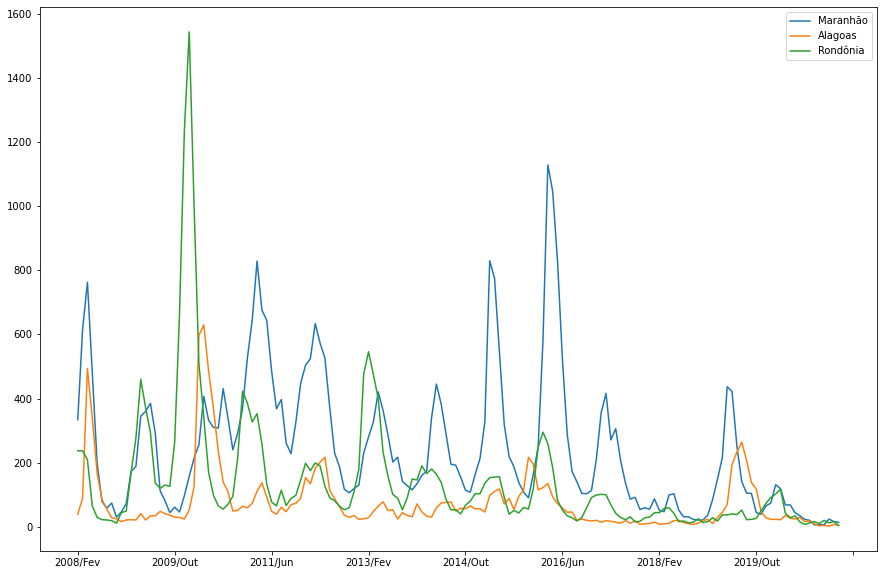

In [55]:
# um gráfico inicial só para confirmar que está tudo funcionando
dengue.drop(['Total', 'Regioes'], axis = 1).sample(3).T.plot(figsize = (15, 10))

Nessa análise inicial dá pra notar que existe uma sazonalidade nos dados da dengue, como era de se esperar. 

Vamos plotar agora dois gráficos, um para os casos de dengue e outro para os gastos hospitalares. Vamos escolher um estado pra ser a "cobaia".

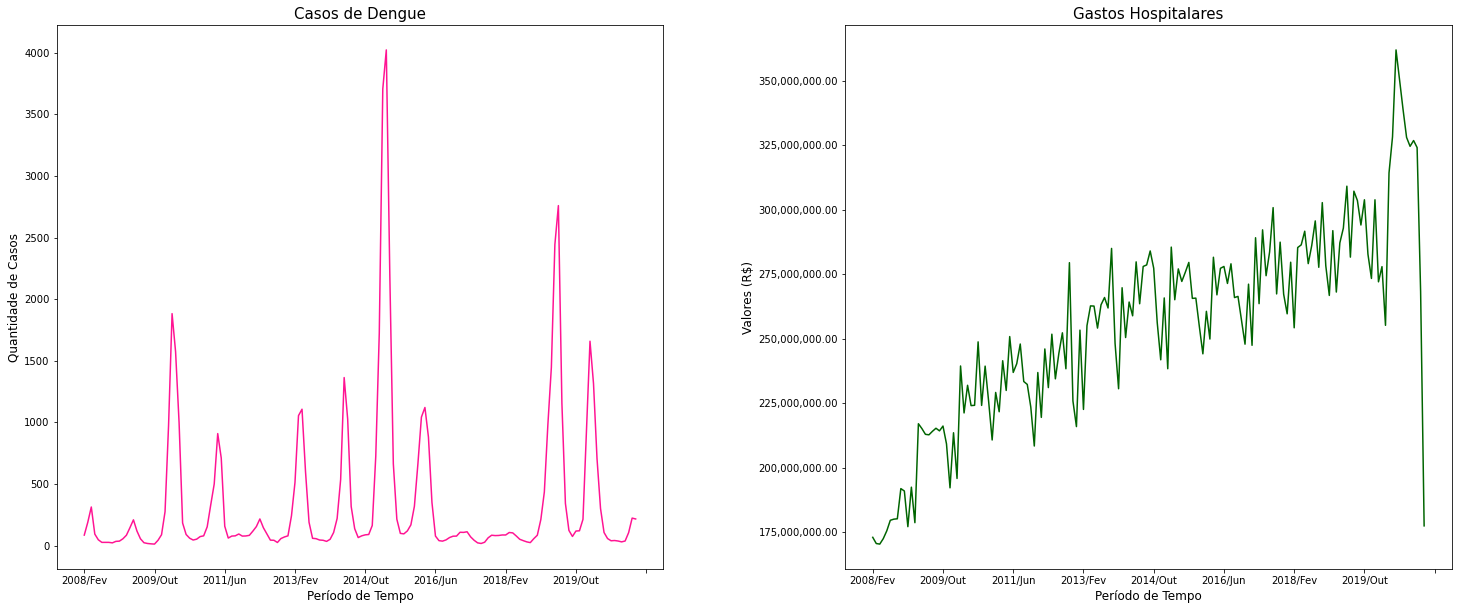

In [74]:
fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (25, 10))

plt.subplots_adjust(wspace = 0.3)

dengue.drop(['Total', 'Regioes'], axis = 1).loc['São Paulo'].T.plot(ax = axes[0], color = 'deeppink')

axes[0].set_title('Casos de Dengue', fontsize = 15)
axes[0].set_xlabel('Período de Tempo', fontdict = {'fontsize': 12})

axes[0].set_ylabel('Quantidade de Casos', fontdict = {'fontsize': 12})

atend_usaveis.drop(['Total', 'Regioes'], axis = 1).loc['São Paulo'].T.plot(ax = axes[1], color = 'darkgreen')
axes[1].set_title('Gastos Hospitalares', fontsize = 15)
axes[1].set_xlabel('Período de Tempo', fontdict = {'fontsize': 12})

axes[1].set_ylabel('Valores (R$)', fontdict = {'fontsize': 12})

axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))


plt.show()

Colocando os gráficos lado a lado não é imediato comparar os picos que estão ocorrendo. Para resolver isso, vamos plotar os dados no mesmo gráficos, com dois eixos 'y'.

Conferindo [nesses gráficos das regiões](#grafico-regioes) quais estados tiveram picos mais acentuados de gastos, vamos escolhê-los para realizar análises.

Aparentemente, os estados com picos mais elevados de gastos são Pernambuco, Rio de Janeiro e São Paulo. Vamos nos concentrar nesses três por enquanto. 

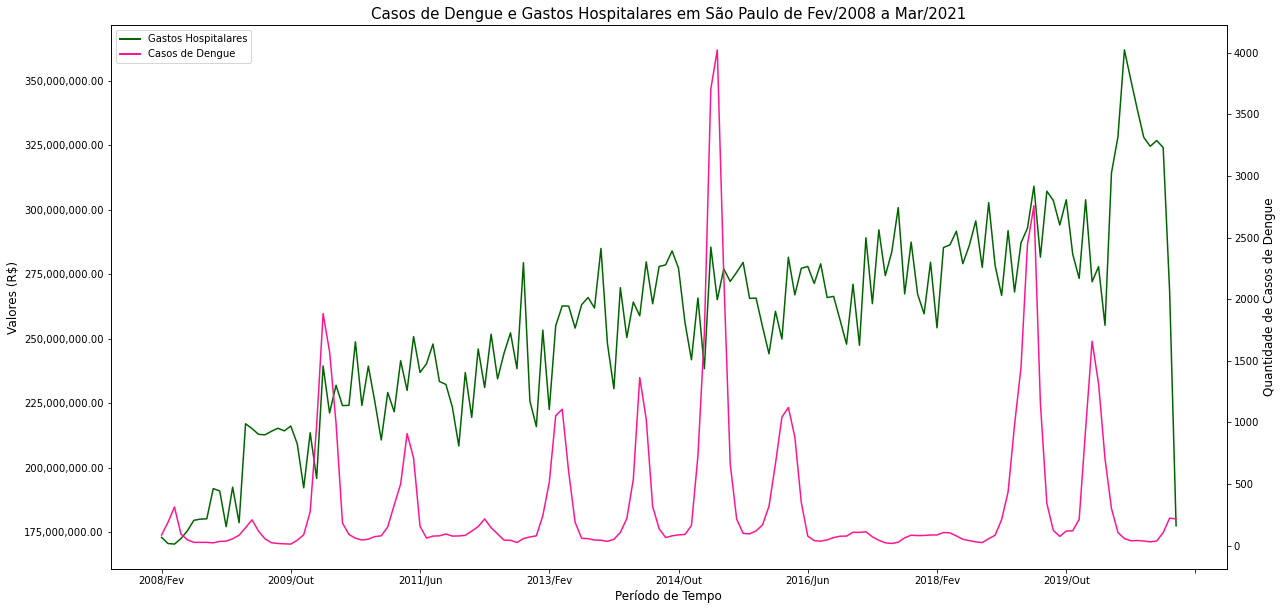

In [72]:
fig, axes = plt.subplots(figsize = (20, 10))

plt.title('Casos de Dengue e Gastos Hospitalares em São Paulo de Fev/2008 a Mar/2021', fontsize = 15)

atend_usaveis.drop(['Total', 'Regioes'], axis = 1).loc['São Paulo'].T.plot(color = 'darkgreen')
axes.set_xlabel( 'Período de Tempo', fontdict = {'fontsize': 12})
axes.set_ylabel('Valores (R$)', fontdict = {'fontsize': 12})

axes2 = axes.twinx()
dengue.drop(['Total', 'Regioes'], axis = 1).loc['São Paulo'].T.plot(color = 'deeppink')
axes2.set_ylabel('Quantidade de Casos de Dengue', fontdict = {'fontsize': 12})

axes.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

custom_lines = [Line2D([0], [0], color = 'darkgreen', lw = 2), Line2D([0], [0], color = 'deeppink', lw = 2)]
axes.legend(custom_lines, ['Gastos Hospitalares', 'Casos de Dengue'])

plt.show()

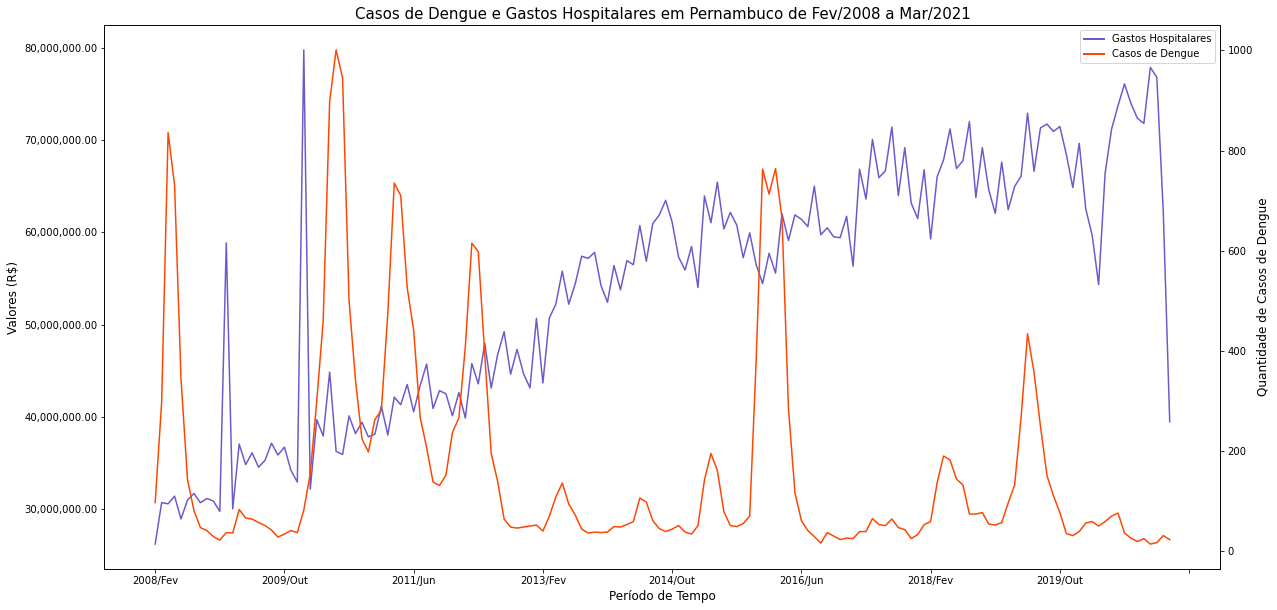

In [68]:
fig, axes = plt.subplots(figsize = (20, 10))

plt.title('Casos de Dengue e Gastos Hospitalares em Pernambuco de Fev/2008 a Mar/2021', fontsize = 15)

atend_usaveis.drop(['Total', 'Regioes'], axis = 1).loc['Pernambuco'].T.plot(color = 'slateblue')
axes.set_xlabel( 'Período de Tempo', fontdict = {'fontsize': 12})
axes.set_ylabel('Valores (R$)', fontdict = {'fontsize': 12})

axes2 = axes.twinx()
dengue.drop(['Total', 'Regioes'], axis = 1).loc['Pernambuco'].T.plot(color = 'orangered')
axes2.set_ylabel('Quantidade de Casos de Dengue', fontdict = {'fontsize': 12})

axes.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

custom_lines = [Line2D([0], [0], color = 'slateblue', lw = 2), Line2D([0], [0], color = 'orangered', lw = 2)]
axes.legend(custom_lines, ['Gastos Hospitalares', 'Casos de Dengue'])

plt.show()

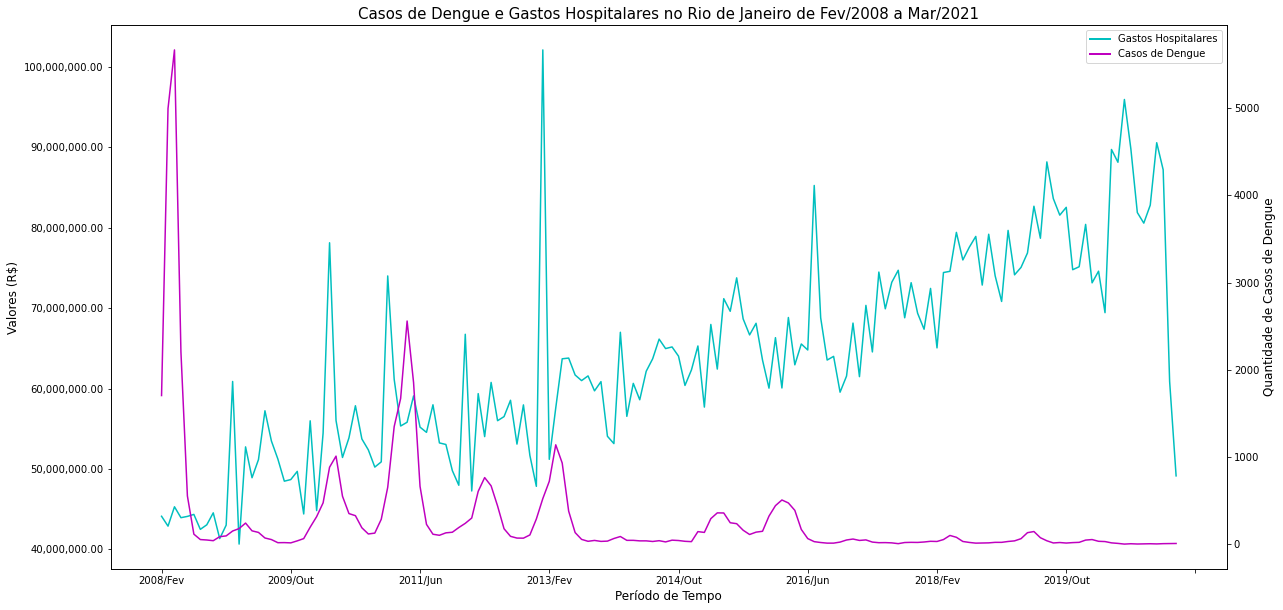

In [73]:
fig, axes = plt.subplots(figsize = (20, 10))

plt.title('Casos de Dengue e Gastos Hospitalares no Rio de Janeiro de Fev/2008 a Mar/2021', fontsize = 15)

atend_usaveis.drop(['Total', 'Regioes'], axis = 1).loc['Rio de Janeiro'].T.plot(color = 'c')
axes.set_xlabel( 'Período de Tempo', fontdict = {'fontsize': 12})
axes.set_ylabel('Valores (R$)', fontdict = {'fontsize': 12})

axes2 = axes.twinx()
dengue.drop(['Total', 'Regioes'], axis = 1).loc['Rio de Janeiro'].T.plot(color = 'm')
axes2.set_ylabel('Quantidade de Casos de Dengue', fontdict = {'fontsize': 12})

axes.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

custom_lines = [Line2D([0], [0], color = 'c', lw = 2), Line2D([0], [0], color = 'm', lw = 2)]
axes.legend(custom_lines, ['Gastos Hospitalares', 'Casos de Dengue'])

# plt.savefig('dengue_gastos.jpg')

plt.show()

Será que conseguimos chegar a alguma conclusão com esses gráficos?

Aparentemente, os picos de gastos se antecipam aos picos de casos de dengue. Isso pode se dar por dois motivos:
- O dataset sobre a dengue está com os dados de certo mês aparecendo apenas no mês seguinte ou
- O governo já sabe que todo ano existem picos de casos de dengue e antecipa a distribuição de mais verbas nesses períodos.


<hr>

Tip: [Matplotlib - List of Names Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

# Aula 04